In [34]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
df=pd.read_csv("https://raw.githubusercontent.com/itsguptaaman/Datasets/main/dataset_full.csv",index_col=None)
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [49]:
def outliers_handel(df, column):
  try:
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    lower_fence = df[column].quantile(0.25) - (iqr * 1.5)
    upper_fence = df[column].quantile(0.75) + (iqr * 1.5)
    df.loc[df[column] <= lower_fence, column] = lower_fence
    df.loc[df[column] >= upper_fence, column] = upper_fence

  except Exception as e:
    pass 


def outliers_handel_passer( df):
  try:
    for col in df.columns:
      outliers_handel(df, col)
  except Exception as e:
    pass

In [50]:
# outliers_handel_passer(df)

In [51]:
x1=df.drop(columns=["phishing"])
x=x1[['qty_slash_url', 'length_url', 'qty_dot_domain', 'qty_vowels_domain',
       'domain_length', 'qty_dot_directory', 'qty_hyphen_directory',
       'qty_equal_directory', 'qty_at_directory', 'qty_exclamation_directory',
       'directory_length', 'qty_dot_file', 'qty_hyphen_file',
       'qty_underline_file', 'qty_equal_file', 'qty_exclamation_file',
       'file_length', 'time_response', 'time_domain_activation',
       'time_domain_expiration', 'qty_nameservers', 'qty_mx_servers',
       'tls_ssl_certificate', 'qty_redirects']]
y=df["phishing"]

In [52]:
# To check multi colinearity
def vif_score(x):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    from sklearn.preprocessing import StandardScaler
    scalar=StandardScaler()
    arr=scalar.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=['Features','VIF_score'])

In [53]:
res=vif_score(x)

In [54]:
result=res[res["VIF_score"]>5]
result

,Features,VIF_score
4,domain_length,5.086612
5,qty_dot_directory,6.826725
7,qty_equal_directory,34.344141
8,qty_at_directory,6.400712
9,qty_exclamation_directory,114.302040
10,directory_length,6.937631
11,qty_dot_file,10.580222
14,qty_equal_file,109.650019
15,qty_exclamation_file,183.666384


In [55]:
column=result["Features"]
column

4                 domain_length
5             qty_dot_directory
7           qty_equal_directory
8              qty_at_directory
9     qty_exclamation_directory
10             directory_length
11                 qty_dot_file
14               qty_equal_file
15         qty_exclamation_file
Name: Features, dtype: object

In [56]:
x.drop(columns=column,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [57]:
x.shape

(88647, 15)

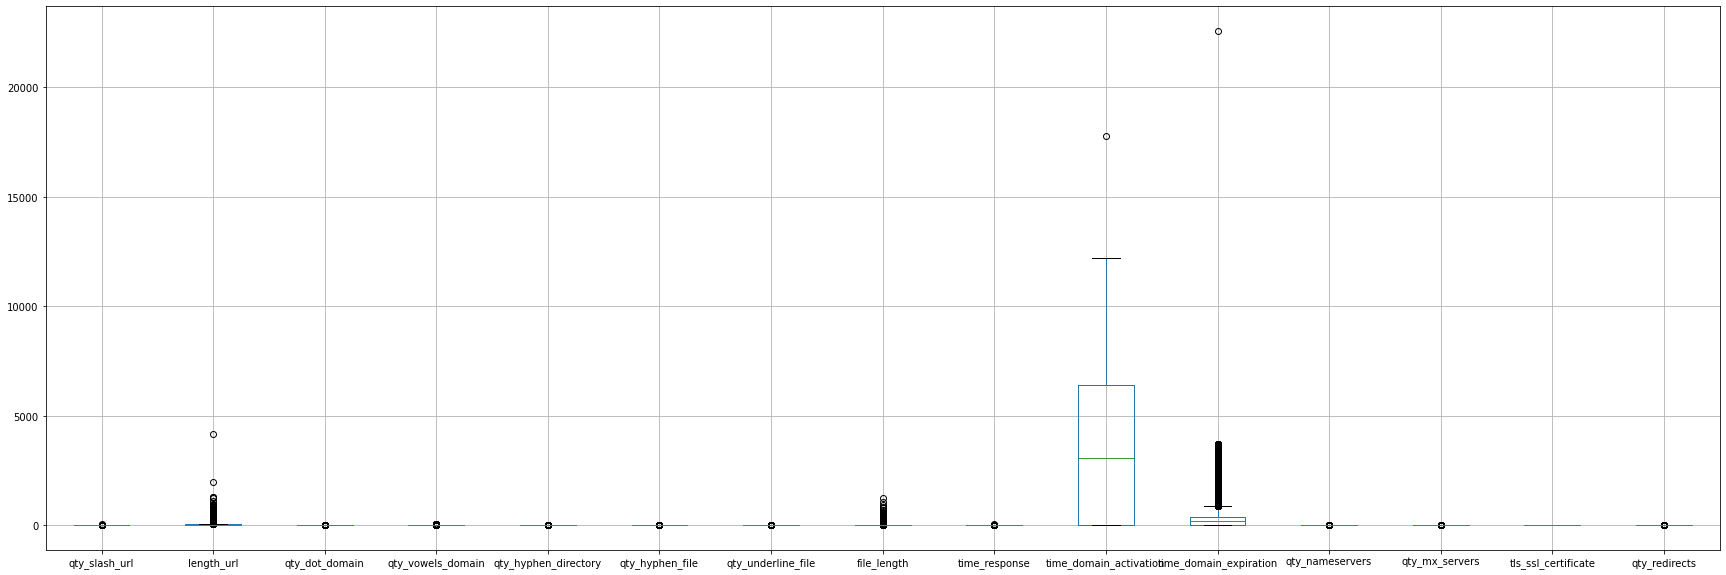

In [58]:
x.boxplot(figsize=(30,10))

In [13]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [14]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2,random_state=100)

In [15]:
x_train.shape

(70917, 19)

In [16]:
x_test.shape

(17730, 19)

In [17]:
dbscan=DBSCAN(eps=1,min_samples=65)

In [18]:
dbscan.fit(x_train)

DBSCAN(eps=1, min_samples=65)

In [19]:
len(dbscan.labels_)

70917

In [20]:
set(dbscan.labels_)

{-1, 0, 1, 2, 3}

In [21]:
metrics.silhouette_score(x_train,dbscan.labels_)

-0.1871279788409657

In [22]:
labels=dbscan.labels_

#identifying the points which makes up our core points
sample_cores=np.zeros_like(labels,dtype=bool)

sample_cores[dbscan.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(labels))- (1 if -1 in labels else 0)
# print(metrics.silhouette_score(x,labels))|

In [23]:
from sklearn.cluster import KMeans

In [24]:
wcss=[]
for i in range(1,20):
    kmean=KMeans(n_clusters=i, init="k-means++",random_state=100)
    kmean.fit(x)
    wcss.append(kmean.inertia_)

Text(0, 0.5, 'WCSS or Inetria')

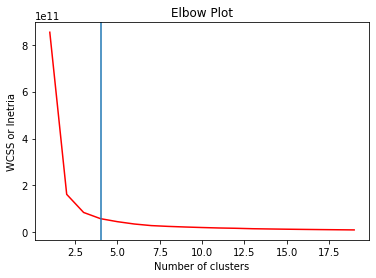

In [25]:
plt.figure()
plt.plot(range(1,20), wcss, color="r")
plt.axvline(x=4)
# plt.axhline(y=20
plt.title("Elbow Plot")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS or Inetria")

In [26]:
kmean=KMeans(n_clusters=5, init="k-means++",random_state=100)
kmean.fit(x)

KMeans(n_clusters=5, random_state=100)

In [27]:
metrics.silhouette_score(x,kmean.labels_)

0.6037061261362434

In [28]:
from sklearn.cluster import KMeans
def k_mean_plus(x_train):
  k_cluster=KMeans(n_clusters=5, init="k-means++",random_state=100)
  k_cluster.fit(x_train)
  x_train["Cluster_no"]=k_cluster.predict(x_train)
  return x_train

In [29]:
k_mean_plus(x_train)

,qty_slash_url,length_url,qty_dot_domain,qty_vowels_domain,domain_length,qty_dot_directory,qty_hyphen_directory,qty_at_directory,directory_length,qty_hyphen_file,qty_underline_file,file_length,time_response,time_domain_activation,time_domain_expiration,qty_nameservers,qty_mx_servers,tls_ssl_certificate,qty_redirects,Cluster_no
26402,0,18,2,5,18,-1,-1,-1,-1,-1,-1,-1,0.382623,7458,210,2,1,1,2,4
16925,0,11,2,2,11,-1,-1,-1,-1,-1,-1,-1,1.028419,8282,119,2,2,1,0,4
50517,0,21,2,6,21,-1,-1,-1,-1,-1,-1,-1,1.048583,3570,812,2,1,0,0,2
86894,0,23,2,10,23,-1,-1,-1,-1,-1,-1,-1,0.188989,-1,-1,2,1,1,0,0
34546,0,14,2,4,14,-1,-1,-1,-1,-1,-1,-1,0.267322,8984,3069,4,1,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65615,0,22,2,6,22,-1,-1,-1,-1,-1,-1,-1,1.027366,6464,840,3,2,0,1,4
77655,0,18,2,6,18,-1,-1,-1,-1,-1,-1,-1,0.825818,6373,200,2,5,0,1,4
79683,0,15,2,2,15,-1,-1,-1,-1,-1,-1,-1,0.372545,3780,236,2,1,1,0,2
56088,0,18,2,5,18,-1,-1,-1,-1,-1,-1,-1,0.663941,4740,372,4,1,1,0,1


In [30]:
x_train[x_train.Cluster_no==0]

,qty_slash_url,length_url,qty_dot_domain,qty_vowels_domain,domain_length,qty_dot_directory,qty_hyphen_directory,qty_at_directory,directory_length,qty_hyphen_file,qty_underline_file,file_length,time_response,time_domain_activation,time_domain_expiration,qty_nameservers,qty_mx_servers,tls_ssl_certificate,qty_redirects,Cluster_no
86894,0,23,2,10,23,-1,-1,-1,-1,-1,-1,-1,0.188989,-1,-1,2,1,1,0,0
24472,0,23,4,5,23,-1,-1,-1,-1,-1,-1,-1,4.130164,565,-1,3,5,1,0,0
35098,2,46,3,6,26,1,0,0,20,0,1,15,1.471005,-1,-1,2,1,1,0,0
37943,4,46,2,2,10,1,1,0,36,0,0,9,1.007075,-1,-1,2,1,1,0,0
42741,4,41,2,3,19,0,1,0,22,0,0,0,6.579115,768,326,3,5,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59243,1,18,2,6,17,0,0,0,1,0,0,0,0.399946,-1,-1,4,1,0,0,0
78833,4,59,1,9,23,0,1,0,36,0,0,7,-1.000000,366,28,4,0,0,-1,0
71182,1,107,2,4,15,1,0,0,9,0,0,8,0.483031,-1,-1,2,1,1,2,0
82270,0,20,3,5,20,-1,-1,-1,-1,-1,-1,-1,-1.000000,-1,-1,2,0,0,-1,0


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [32]:
scale=StandardScaler()
x_train=pd.DataFrame(scale.fit_transform(x_train),columns=x_train.columns)

In [33]:
x_test=pd.DataFrame(scale.transform(x_test),columns=x_test.columns)
x_test

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- Cluster_no

  warnings.warn(message, FutureWarning)


ValueError: ignored

In [ ]:
log=LogisticRegression()
log.fit(x_train,y_train)

In [ ]:
def model_evaluation(y_test,y_predict):
    from sklearn.metrics import confusion_matrix
    # t : True, f : False, n : Negative, p : Positive
    # .ravel will give ndarray in 1d array 
    tn, fp, fn, tp = confusion_matrix(y_test,y_predict).ravel()
    accuracy = (tp+tn)/(tp+fp+fn+tn)
    recall = (tp)/(tp+fn)
    precision = (tp)/(tp+fp)
    f1 = ( 2 * ( precision * recall ) / ( precision + recall ) )
    specificity = (tn)/(tn+fp)
    results = {"Accuracy":accuracy,"Recall" : recall, "Precision" : precision,"F1" : f1,
              "Specificity" : specificity}
    return results

In [ ]:
pread=log.predict(x_test)

In [ ]:
model_evaluation(y_test,pread)

In [ ]:
model_evaluation(y_test,pread)


In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(x_train,y_train)

In [ ]:
pre=dt.predict(x_test)

In [ ]:
model_evaluation(y_test,pre)

In [ ]:
gb=GradientBoostingClassifier()

In [ ]:
gb.fit(x_train,y_train)
pread=gb.predict(x_test)

In [ ]:
model_evaluation(y_test,pread)

In [ ]:
model_evaluation(y_test,pread)